In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


#importing the necessary library

In [3]:
#reading the data

df=pd.read_csv(r'C:\\Users\\HP\Downloads\used_device_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

We gat Missing Value ✅✅

In [4]:
#columns info!

import sketch

df.sketch.ask('Can you give me friendly names and singles sentence descriptions of each columns (format output as HTML Price list)')

In [5]:
#table


df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [6]:
print('the dataset is made up of',df.shape[0],'rows and',df.shape[1],'Columns')

the dataset is made up of 3454 rows and 15 Columns


In [7]:
#let create a func

for i in df.columns:
    print(f'{i}:{df[i].nunique()}')

device_brand:34
os:4
screen_size:142
4g:2
5g:2
rear_camera_mp:41
front_camera_mp:37
internal_memory:15
ram:12
battery:324
weight:555
release_year:8
days_used:924
normalized_used_price:3094
normalized_new_price:2988


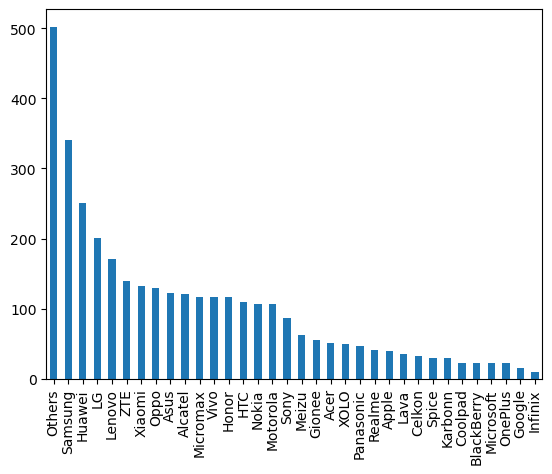

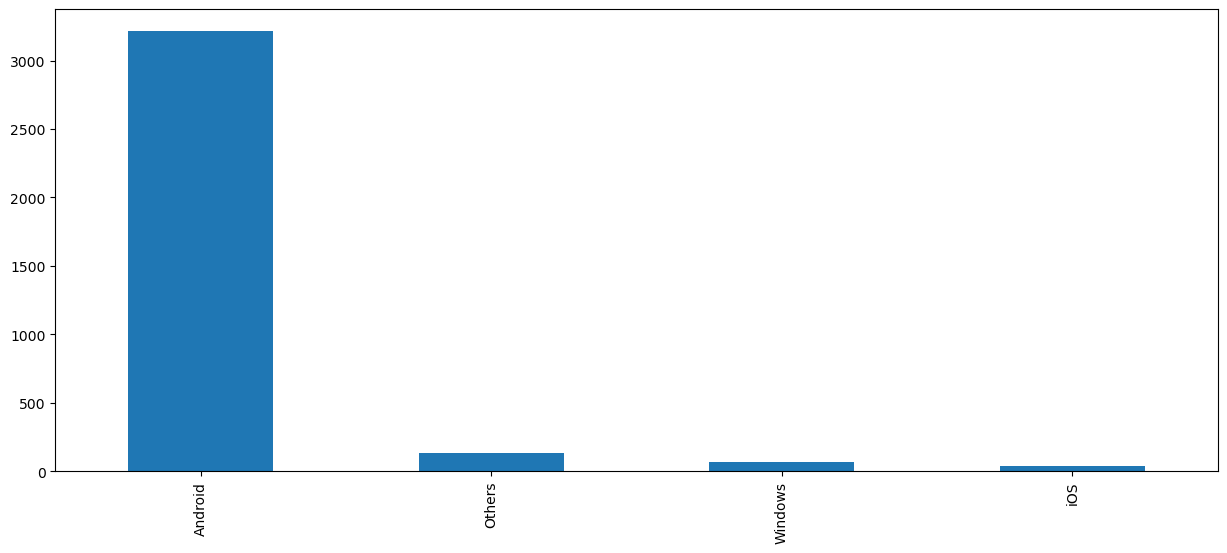

<Figure size 1500x600 with 0 Axes>

In [8]:
Label=['device_brand','os']

for i in Label:
    df[i].value_counts().plot(kind='bar')
    df[i].value_counts().plot(kind='bar')
    plt.figure(figsize=(15,6))

In [9]:
num_df=df.select_dtypes('number')

<AxesSubplot:>

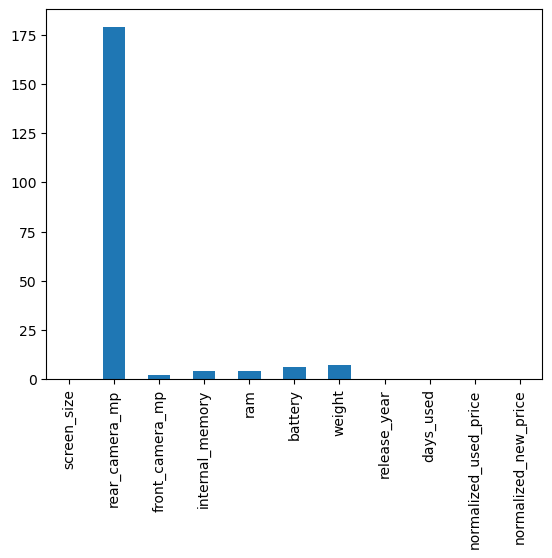

In [10]:
#let plot out the Missing Value 

num_df.isnull().sum().plot.bar()

#rear Cemera_mp columns gat More misisng values, but i will just drop the missing rows

In [11]:
df=df.dropna()

In [12]:
#new datashappe

print(f'The New data shape is ' + str(df.shape))

The New data shape is (3253, 15)


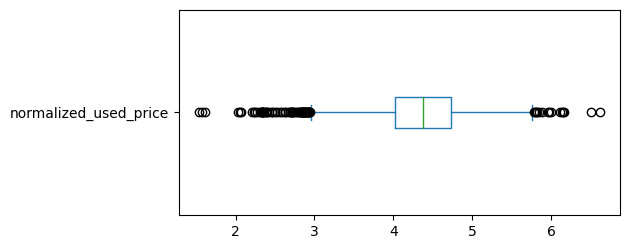

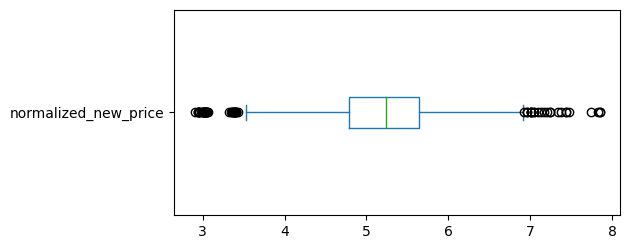

<Figure size 640x480 with 0 Axes>

In [13]:
num_df=df.select_dtypes('number')

Labels=['normalized_used_price','normalized_new_price']

for i in Labels:
    plt.subplot(1,1,1)
    df[i].plot.box(vert=False)
    plt.subplot(2,1,2)
    df[i].plot.box(vert=False)
    plt.tight_layout()
    plt.figure()

<AxesSubplot:ylabel='Density'>

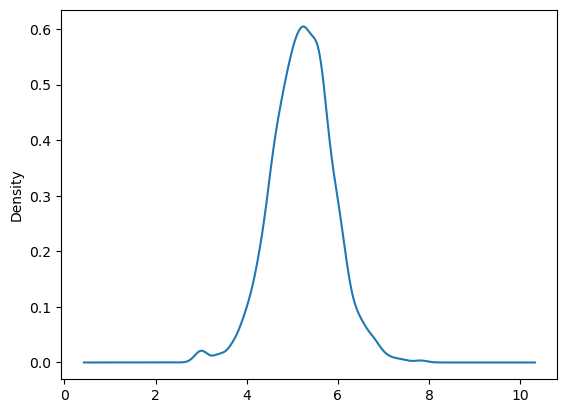

In [14]:
df['normalized_new_price'].plot.kde()

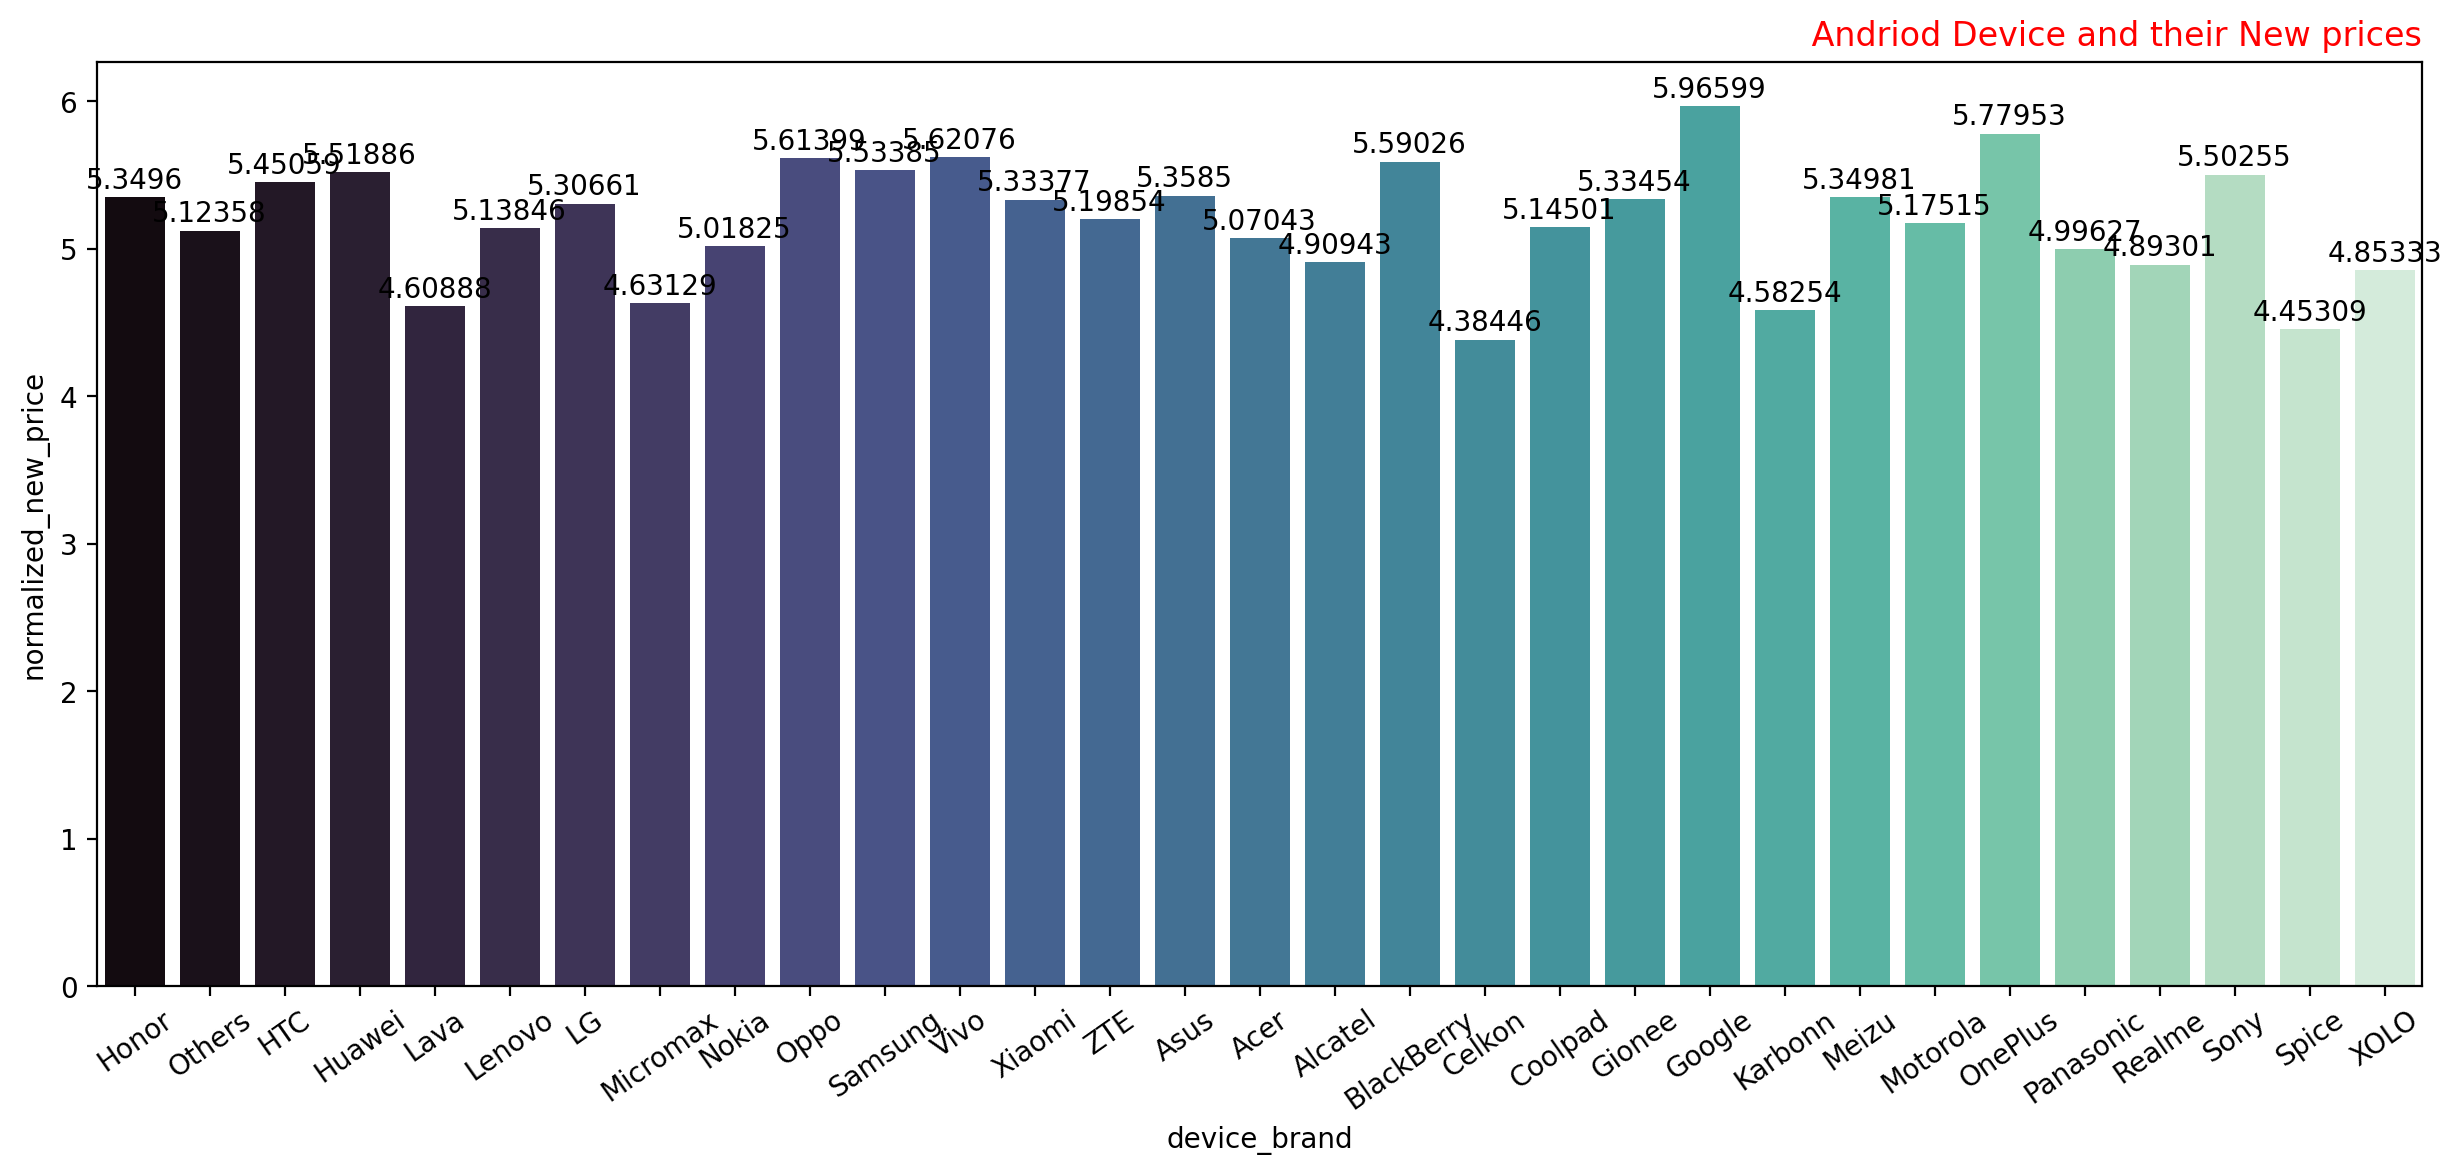

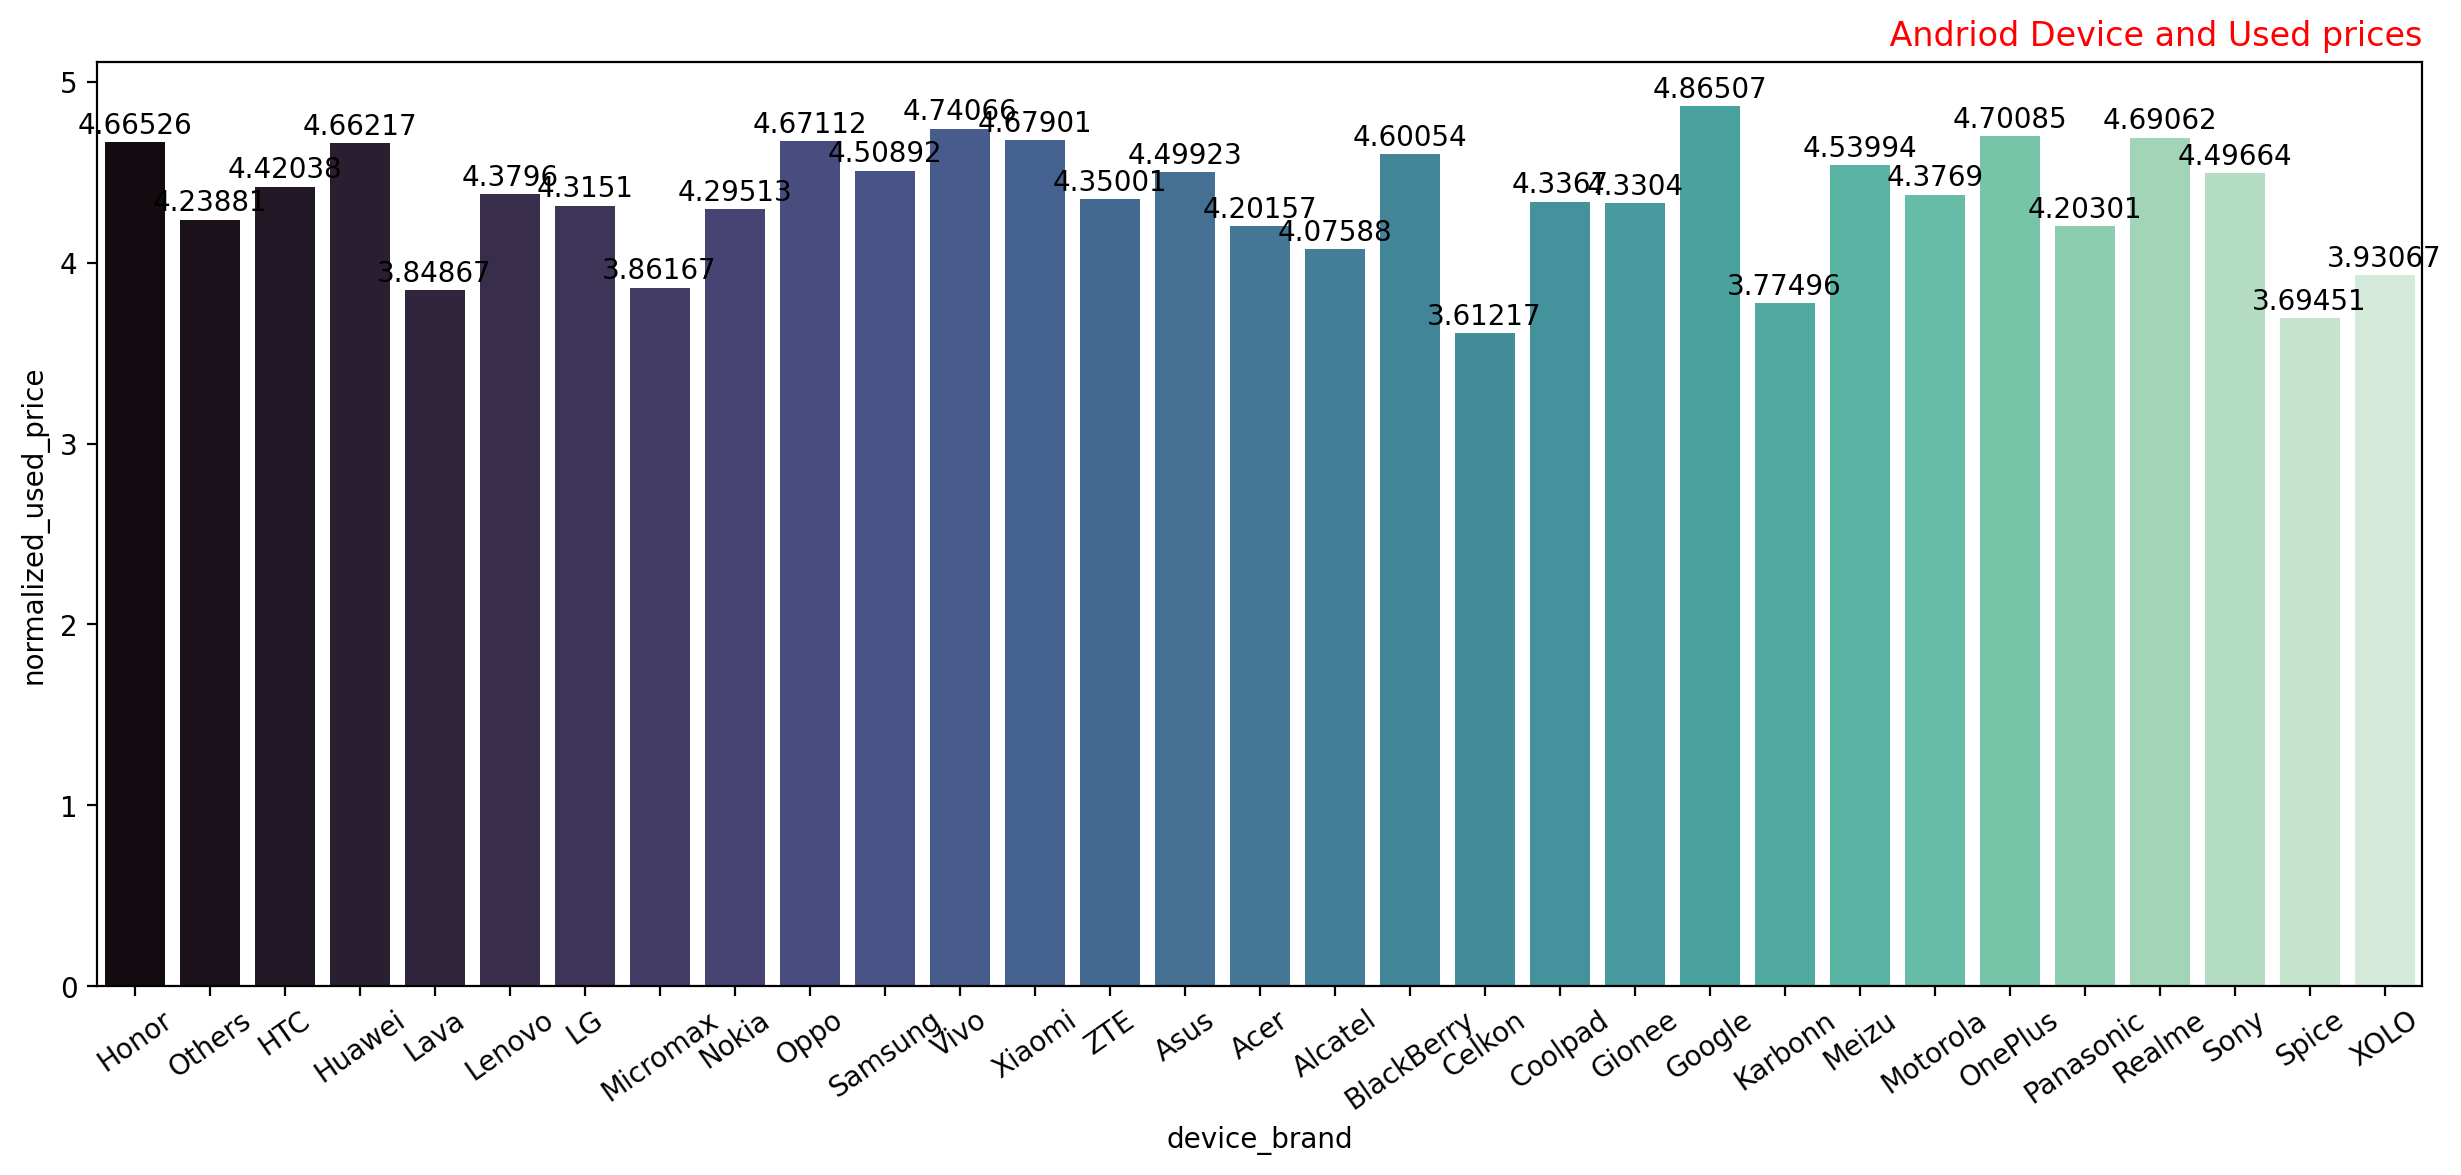

In [15]:
#let Check for the type of brand that has High cost and Low Cost

plt.figure(figsize=(15,6),dpi=200)
fig=sns.barplot(data=df[df['os']=='Android'],x='device_brand',y='normalized_new_price',palette='mako',ci=None)
plt.title(' Andriod Device and their New prices',loc='right',c='r')
plt.xticks(rotation=35)

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=1)

plt.figure(figsize=(15,6),dpi=200)
fig=sns.barplot(data=df[df['os']=='Android'],x='device_brand',y='normalized_used_price',palette='mako',ci=None)
plt.title(' Andriod Device and Used prices',loc='right',c='r')
plt.xticks(rotation=35);


for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=1);

In All Andriod Phone the mOst expensive andriod phones are Google came first follow by Plus One follow By Google phones, both in The new fone and the Fairly used fone price.

what make the Phones more costly than the Others????

In [16]:
#so here, we focusing our attention to Andriod phones alone

devices_brand=df[df['os']=='Android']

devices_brand.sample(10)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3153,ZTE,Android,12.70,yes,no,13.0,5.0,16.0,4.0,2400.0,154.0,2015,793,4.381151,5.385962
3098,ZTE,Android,15.24,yes,no,13.0,5.0,64.0,4.0,4100.0,196.0,2016,591,4.291418,5.859218
2231,Panasonic,Android,10.29,yes,no,5.0,0.3,32.0,4.0,1800.0,138.0,2015,938,3.489513,4.612543
305,LG,Android,13.84,yes,no,8.0,5.0,16.0,2.0,3000.0,148.0,2019,438,4.367801,4.936917
1407,Huawei,Android,12.70,no,no,13.0,1.3,32.0,4.0,3000.0,170.0,2013,938,4.752124,5.738796
57,Huawei,Android,10.16,no,no,5.0,2.0,16.0,4.0,1700.0,136.1,2014,666,3.579344,4.703113
3311,Xiaomi,Android,16.43,yes,no,12.0,32.0,256.0,8.0,5260.0,208.0,2019,355,5.529191,6.327133
1584,Lenovo,Android,25.43,yes,no,8.0,1.6,16.0,4.0,9600.0,619.0,2014,723,5.224617,5.705814
853,Others,Android,12.70,no,no,5.0,0.3,16.0,4.0,2000.0,156.0,2015,572,3.916015,4.371597
2848,Vivo,Android,12.83,yes,no,13.0,5.0,16.0,4.0,3000.0,157.0,2017,799,4.396299,5.133207


In [17]:
#value count for 4g and 5g devices

devices_brand['4g'].value_counts(),devices_brand['5g'].value_counts()

(yes    2053
 no      971
 Name: 4g, dtype: int64,
 no     2939
 yes      85
 Name: 5g, dtype: int64)

#i Gat 2053 fones as 4g why 971 is not 4g, That is total sum of total Dataset.
so it should be believe that we gat the rest 971 has 5g fone.

#i plotted for 5g too, and now we gat 85 fones is 5g and the rest 2939 is not 5g fone.

there is totally an Imbalance in the fone category.

that is to say in Sum cases we till have fone that dosen't have 4g or 5g network.

in these modern world, The amount of RAM matters across different brands, and it is an important factor for more efficicency of a device.

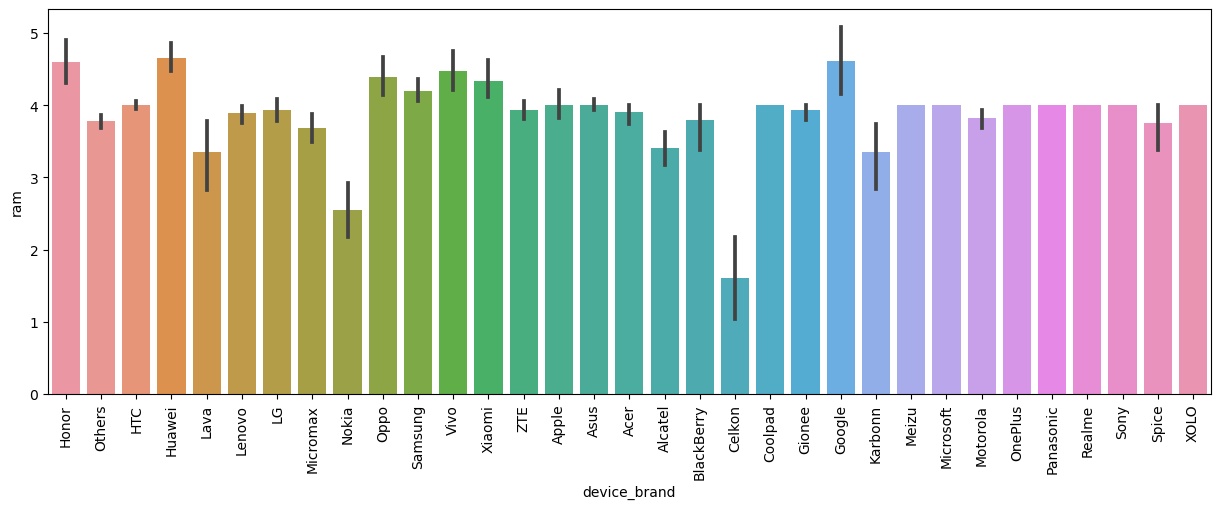

In [18]:
#plotting the devices by rams

plt.figure(figsize=(15, 5))
fig=sns.barplot(data=df, x="device_brand", y="ram")
plt.xticks(rotation=90)
plt.show()

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=1)

A battery with a capacity of 4500 mAh or 4500 will be able to provide power for a longer duration compared to a battery with a lower capacity. The higher the battery capacity, the longer the battery can last before needing to be recharged.

so it better we filter them Out.

<AxesSubplot:title={'center':'Devices by battery'}, xlabel='device_brand'>

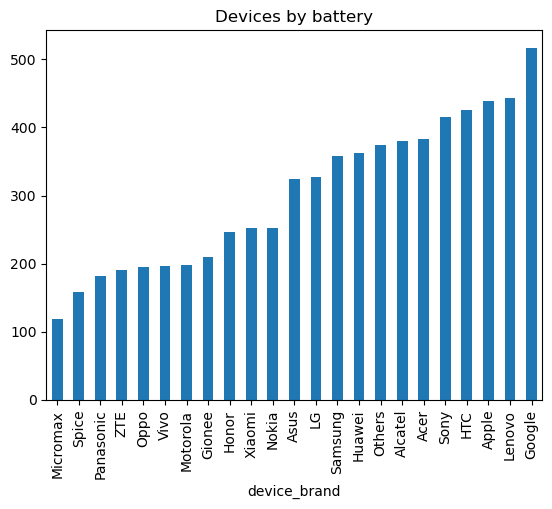

In [19]:
battery_df=df[df.battery >= 4500]

battery_df.groupby('device_brand')['weight'].mean().sort_values(ascending=True).plot(kind='bar',title='Devices by battery')

Device whose batteryy capacity is more than 4500mAh and by their weight.

A better screen size device phone typically features a larger screen, often ranging from 6 inches to 7 inches or more diagonally. This larger display allows for more content to be displayed at once, making it easier to read text, view images, and watch videos.

To convert inches to centimeters,using the conversion factor of 2.54 centimeters per inch. 

6 inches * 2.54 centimeters/inch = 15.24 centimeters

<AxesSubplot:title={'center':'Phones with Bigger Screens'}>

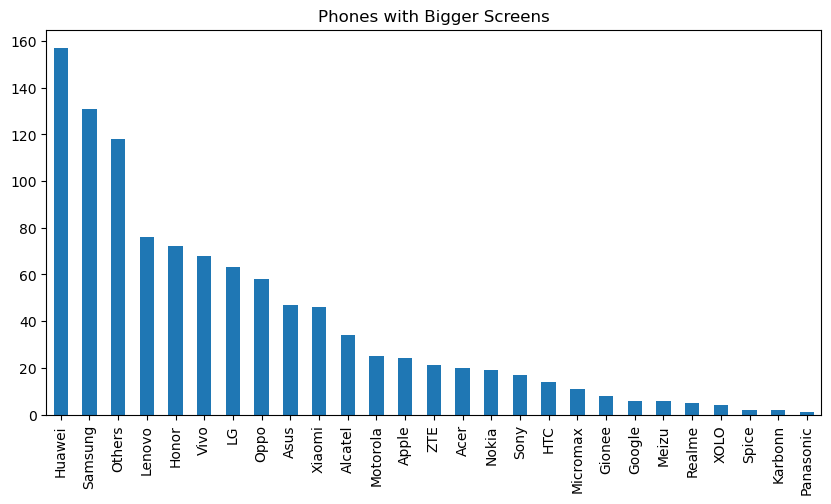

In [20]:
screen_df=df[df['screen_size'] >= 6*2.54]

screen_df['device_brand'].value_counts().plot. bar(figsize=(10,5),title="Phones with Bigger Screens")

Huawei take the lead as the fones with Bigger screens, follow by samsung,and others

In [21]:
df["device_category"] = pd.cut(x=df['normalized_new_price'],bins=[-np.infty, 4, 6, np.infty],
                               labels=["Budget", "Mid-ranger", "Premium"])

C:\Users\HP\AppData\Local\Temp\ipykernel_19568\2914148297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["device_category"] = pd.cut(x=df['normalized_new_price'],bins=[-np.infty, 4, 6, np.infty],


In [22]:
df['device_category'].value_counts()

Mid-ranger    2805
Premium        335
Budget         113
Name: device_category, dtype: int64

In [23]:
df['normalized_new_price'].unique()

array([4.71510025, 5.51901794, 5.88463072, ..., 6.25153773, 4.62418819,
       4.27999391])

In [24]:
df.query('device_category=="Mid-ranger"')

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,device_category
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,Mid-ranger
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,Mid-ranger
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,Mid-ranger
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,Mid-ranger
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,Mid-ranger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3443,Samsung,Android,14.81,yes,no,8.0,5.0,32.0,2.0,3000.0,141.0,2019,383,4.191320,4.309187,Mid-ranger
3444,Apple,iOS,10.34,yes,no,12.0,7.0,64.0,3.0,1821.0,148.0,2020,235,5.011901,5.875352,Mid-ranger
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829,Mid-ranger
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188,Mid-ranger


<AxesSubplot:xlabel='device_category', ylabel='4g'>

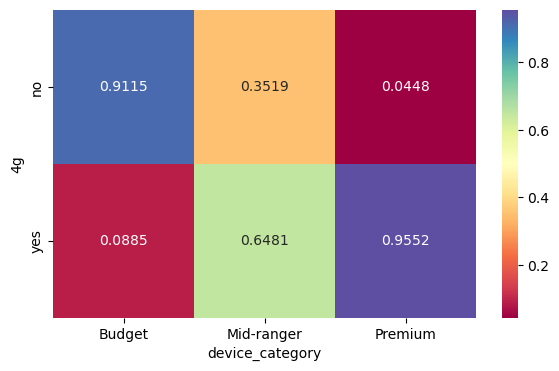

In [25]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.heatmap(
    pd.crosstab(df["4g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral")

<AxesSubplot:xlabel='device_category', ylabel='5g'>

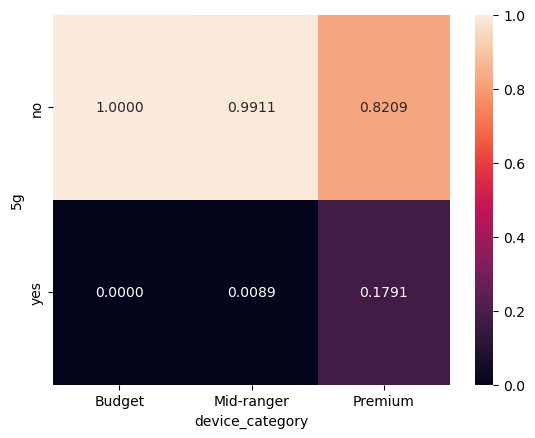

In [26]:
sns.heatmap(pd.crosstab(df["5g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f")

In [27]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,device_category
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,Mid-ranger
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,Mid-ranger
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,Mid-ranger
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,Mid-ranger
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,Mid-ranger


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
code=LabelEncoder()

In [30]:
df['4g']=code.fit_transform(df['4g'])
df['5g']=code.fit_transform(df['5g'])
df['os']=code.fit_transform(df['os'])
df['device_brand']=code.fit_transform(df['device_brand'])

In [31]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,device_category
0,10,0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,Mid-ranger
1,10,0,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,Mid-ranger
2,10,0,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,Mid-ranger
3,10,0,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,Mid-ranger
4,10,0,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,Mid-ranger


<AxesSubplot:>

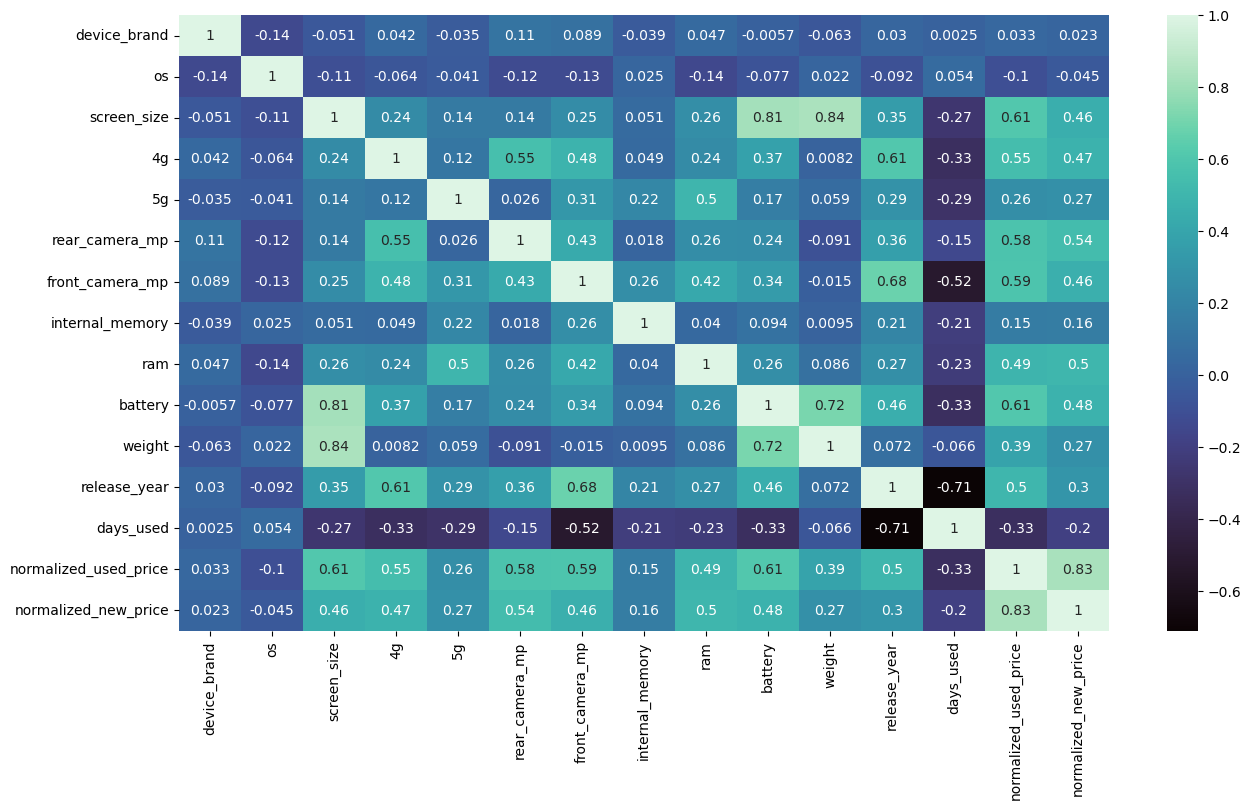

In [32]:
#checing for correlation 

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='mako')

In [34]:
#ML

#let import the necessary Library for ML

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
#assignng the new value and the X and y

X=df.drop(['normalized_new_price','device_category'],axis=1)

y=df['normalized_new_price']

In [36]:
#Splitting the value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [37]:
#Calling on the model

model=LinearRegression()

In [38]:
model.fit(X_train,y_train)

LinearRegression()

In [39]:
pd.DataFrame(data=model.coef_,columns=['weight'],index=X.columns).sort_values('weight',ascending=False)

,weight
normalized_used_price,0.895815
5g,0.264371
4g,0.164452
os,0.061368
ram,0.058649
rear_camera_mp,0.008930
screen_size,0.006610
front_camera_mp,0.000527
internal_memory,0.000492
battery,0.000038


In [40]:
#Importing the Evaluation libraries

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [41]:


#let check for the level of their fittness

test_prediction=model.predict(X_test)

print('Mean Absolute Error: %.2f'%mean_absolute_error(y_test,test_prediction))
print('Mean Square Erroe: %.2f'%mean_squared_error(y_test,test_prediction))
print('Root Mean Square Error:%.2f'%np.sqrt(mean_squared_error(y_test,test_prediction)))
print('R_Squared:%.2f'% r2_score(y_test,test_prediction))

Mean Absolute Error: 0.26
Mean Square Erroe: 0.12
Root Mean Square Error:0.34
R_Squared:0.74


In [42]:
#models

from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [43]:
#i Imported a butch of Libraries

models=[]

models.append(('BaggClassier',BaggingRegressor()))
models.append(('RandomRegressor',RandomForestRegressor()))
models.append(('ExtraRegressor',ExtraTreesRegressor()))
models.append(('DecisionTree',DecisionTreeRegressor()))
models.append(('SVR',SVR()))
models.append(('KNR',KNeighborsRegressor()))

In [45]:
#importing Cross validation method

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [50]:
#we Kfold and Scoring metrics

fold=KFold(n_splits=5)
scoring='neg_mean_squared_error'

In [51]:
#Evauating Each Model


results=[] 
names=[]

for name,modell in models:
    cv_result=cross_val_score(modell,X_train,y_train,cv=fold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    final='%s: %f (%f)' % (name,cv_result.mean(),cv_result.std())
    print(final)

BaggClassier: -0.102339 (0.006890)
RandomRegressor: -0.092700 (0.007601)
ExtraRegressor: -0.089005 (0.009390)
DecisionTree: -0.188970 (0.017395)
SVR: -0.287038 (0.015713)
KNR: -0.268373 (0.013078)


ExtraRegressor seems to be the lowest Nen_mean_squared_Error follow by RandomRegressor

In [58]:
#using that aprticular model

model_1=ExtraTreesRegressor()
model_1.fit(X_train,y_train)

ExtraTreesRegressor()

In [59]:
#EValuating the test_prediction

test_prediction=model_1.predict(X_test)

In [60]:
#metrics scores

print('Mean Absolute Error: %.2f'%mean_absolute_error(y_test,test_prediction))
print('Mean Square Erroe: %.2f'%mean_squared_error(y_test,test_prediction))
print('Root Mean Square Error:%.2f'%np.sqrt(mean_squared_error(y_test,test_prediction)))
print('R_Squared:%.2f'% r2_score(y_test,test_prediction))

Mean Absolute Error: 0.22
Mean Square Erroe: 0.09
Root Mean Square Error:0.30
R_Squared:0.80


In [61]:
#let Save our Model

import pickle as pk

In [63]:
with open('model_1.pk','wb') as file:
    pk.dump(model_1,file)